<a href="https://colab.research.google.com/github/GeorgeSherif/ChatEGP/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pygal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import os
import warnings
import csv
from textblob import TextBlob
import re
from nltk.stem.isri import ISRIStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import pygal as py
import matplotlib
plt.rcParams["figure.figsize"] = (8,5)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Culture'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileCulture.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0059.txt', '0050.txt', '0011.txt', '0002.txt', '0079.txt', '0030.txt', '0028.txt', '0080.txt', '0100.txt', '0062.txt', '0025.txt', '0061.txt', '0037.txt', '0003.txt', '0055.txt', '0039.txt', '0054.txt', '0026.txt', '0110.txt', '0072.txt', '0017.txt', '0105.txt', '0047.txt', '0000.txt', '0107.txt', '0099.txt', '0027.txt', '0096.txt', '0033.txt', '0034.txt', '0038.txt', '0066.txt', '0042.txt', '0035.txt', '0029.txt', '0058.txt', '0053.txt', '0094.txt', '0023.txt', '0092.txt', '0090.txt', '0020.txt', '0004.txt', '0109.txt', '0087.txt', '0073.txt', '0018.txt', '0006.txt', '0069.txt', '0088.txt', '0051.txt', '0045.txt', '0074.txt', '0089.txt', '0064.txt', '0070.txt', '0104.txt', '0008.txt', '0111.txt', '0081.txt', '0015.txt', '0083.txt', '0048.txt', '0085.txt', '0056.txt', '0043.txt', '0041.txt', '0067.txt', '0097.txt', '0063.txt', '0076.txt', '0082.txt', '0013.txt', '0001.txt', '0065.txt', '0044.txt', '0086.txt', '0012.txt', '0036.txt', '0046.txt', '0098.txt', '0032.txt', '0052.txt', '01

In [4]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Tech'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileTech.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0095.txt', '0052.txt', '0046.txt', '0053.txt', '0119.txt', '0066.txt', '0057.txt', '0112.txt', '0008.txt', '0049.txt', '0061.txt', '0108.txt', '0110.txt', '0084.txt', '0019.txt', '0093.txt', '0102.txt', '0029.txt', '0004.txt', '0099.txt', '0114.txt', '0100.txt', '0030.txt', '0015.txt', '0116.txt', '0076.txt', '0022.txt', '0037.txt', '0006.txt', '0101.txt', '0023.txt', '0025.txt', '0035.txt', '0028.txt', '0018.txt', '0014.txt', '0044.txt', '0089.txt', '0064.txt', '0088.txt', '0043.txt', '0054.txt', '0090.txt', '0069.txt', '0012.txt', '0117.txt', '0041.txt', '0059.txt', '0026.txt', '0072.txt', '0021.txt', '0091.txt', '0000.txt', '0027.txt', '0003.txt', '0001.txt', '0115.txt', '0082.txt', '0032.txt', '0020.txt', '0013.txt', '0039.txt', '0062.txt', '0067.txt', '0094.txt', '0045.txt', '0071.txt', '0080.txt', '0005.txt', '0034.txt', '0060.txt', '0073.txt', '0010.txt', '0070.txt', '0077.txt', '0011.txt', '0040.txt', '0048.txt', '0107.txt', '0104.txt', '0079.txt', '0042.txt', '0087.txt', '00

In [5]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Sports'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileSports.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0113.txt', '0085.txt', '0063.txt', '0119.txt', '0070.txt', '0123.txt', '0028.txt', '0035.txt', '0005.txt', '0135.txt', '0044.txt', '0007.txt', '0097.txt', '0059.txt', '0131.txt', '0122.txt', '0055.txt', '0067.txt', '0021.txt', '0053.txt', '0016.txt', '0015.txt', '0120.txt', '0043.txt', '0046.txt', '0010.txt', '0105.txt', '0036.txt', '0098.txt', '0101.txt', '0050.txt', '0034.txt', '0089.txt', '0057.txt', '0092.txt', '0066.txt', '0023.txt', '0139.txt', '0125.txt', '0109.txt', '0003.txt', '0124.txt', '0014.txt', '0077.txt', '0116.txt', '0017.txt', '0137.txt', '0045.txt', '0074.txt', '0052.txt', '0080.txt', '0026.txt', '0033.txt', '0126.txt', '0103.txt', '0049.txt', '0069.txt', '0076.txt', '0011.txt', '0000.txt', '0134.txt', '0073.txt', '0041.txt', '0060.txt', '0004.txt', '0009.txt', '0075.txt', '0084.txt', '0095.txt', '0128.txt', '0072.txt', '0056.txt', '0091.txt', '0037.txt', '0099.txt', '0062.txt', '0064.txt', '0002.txt', '0024.txt', '0114.txt', '0087.txt', '0102.txt', '0038.txt', '01

In [6]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Religion'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileReligion.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0073.txt', '0053.txt', '0023.txt', '0072.txt', '0065.txt', '0014.txt', '0084.txt', '0075.txt', '0066.txt', '0105.txt', '0022.txt', '0056.txt', '0047.txt', '0098.txt', '0042.txt', '0006.txt', '0028.txt', '0003.txt', '0031.txt', '0051.txt', '0099.txt', '0115.txt', '0049.txt', '0109.txt', '0012.txt', '0041.txt', '0009.txt', '0035.txt', '0103.txt', '0067.txt', '0011.txt', '0113.txt', '0117.txt', '0080.txt', '0111.txt', '0100.txt', '0037.txt', '0069.txt', '0123.txt', '0040.txt', '0007.txt', '0008.txt', '0118.txt', '0026.txt', '0043.txt', '0119.txt', '0005.txt', '0060.txt', '0077.txt', '0070.txt', '0126.txt', '0106.txt', '0091.txt', '0104.txt', '0101.txt', '0112.txt', '0082.txt', '0038.txt', '0081.txt', '0058.txt', '0045.txt', '0063.txt', '0036.txt', '0000.txt', '0124.txt', '0071.txt', '0018.txt', '0025.txt', '0030.txt', '0001.txt', '0102.txt', '0120.txt', '0083.txt', '0039.txt', '0107.txt', '0015.txt', '0033.txt', '0052.txt', '0108.txt', '0050.txt', '0092.txt', '0034.txt', '0019.txt', '00

In [7]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Politics'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_filePolitics.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0088.txt', '0064.txt', '0034.txt', '0077.txt', '0076.txt', '0053.txt', '0059.txt', '0067.txt', '0006.txt', '0086.txt', '0072.txt', '0109.txt', '0010.txt', '0079.txt', '0081.txt', '0050.txt', '0048.txt', '0095.txt', '0105.txt', '0082.txt', '0065.txt', '0045.txt', '0015.txt', '0106.txt', '0049.txt', '0070.txt', '0101.txt', '0063.txt', '0032.txt', '0102.txt', '0071.txt', '0096.txt', '0004.txt', '0075.txt', '0016.txt', '0089.txt', '0103.txt', '0022.txt', '0019.txt', '0056.txt', '0030.txt', '0107.txt', '0009.txt', '0090.txt', '0069.txt', '0057.txt', '0036.txt', '0039.txt', '0029.txt', '0038.txt', '0037.txt', '0054.txt', '0112.txt', '0011.txt', '0113.txt', '0084.txt', '0092.txt', '0042.txt', '0080.txt', '0078.txt', '0002.txt', '0085.txt', '0052.txt', '0066.txt', '0108.txt', '0100.txt', '0008.txt', '0047.txt', '0013.txt', '0020.txt', '0023.txt', '0062.txt', '0110.txt', '0061.txt', '0044.txt', '0074.txt', '0068.txt', '0098.txt', '0051.txt', '0014.txt', '0027.txt', '0012.txt', '0083.txt', '00

In [8]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Medical'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileMedical.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0041.txt', '0141.txt', '0063.txt', '0172.txt', '0004.txt', '0051.txt', '0144.txt', '0054.txt', '0126.txt', '0068.txt', '0036.txt', '0177.txt', '0062.txt', '0088.txt', '0134.txt', '0154.txt', '0101.txt', '0001.txt', '0174.txt', '0095.txt', '0077.txt', '0140.txt', '0194.txt', '0093.txt', '0124.txt', '0029.txt', '0160.txt', '0163.txt', '0168.txt', '0059.txt', '0024.txt', '0052.txt', '0084.txt', '0207.txt', '0003.txt', '0021.txt', '0202.txt', '0092.txt', '0184.txt', '0070.txt', '0073.txt', '0120.txt', '0098.txt', '0046.txt', '0035.txt', '0127.txt', '0087.txt', '0181.txt', '0082.txt', '0122.txt', '0012.txt', '0057.txt', '0149.txt', '0091.txt', '0152.txt', '0031.txt', '0165.txt', '0049.txt', '0097.txt', '0205.txt', '0108.txt', '0081.txt', '0139.txt', '0116.txt', '0115.txt', '0158.txt', '0159.txt', '0090.txt', '0150.txt', '0074.txt', '0040.txt', '0211.txt', '0183.txt', '0005.txt', '0076.txt', '0094.txt', '0067.txt', '0058.txt', '0105.txt', '0123.txt', '0196.txt', '0178.txt', '0195.txt', '02

In [9]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Finance'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileFinance.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0092.txt', '0008.txt', '0028.txt', '0106.txt', '0091.txt', '0077.txt', '0063.txt', '0095.txt', '0026.txt', '0032.txt', '0012.txt', '0018.txt', '0071.txt', '0064.txt', '0033.txt', '0011.txt', '0110.txt', '0016.txt', '0045.txt', '0078.txt', '0096.txt', '0060.txt', '0098.txt', '0088.txt', '0090.txt', '0004.txt', '0101.txt', '0051.txt', '0069.txt', '0001.txt', '0103.txt', '0052.txt', '0005.txt', '0104.txt', '0059.txt', '0046.txt', '0037.txt', '0007.txt', '0085.txt', '0072.txt', '0105.txt', '0108.txt', '0036.txt', '0050.txt', '0029.txt', '0013.txt', '0087.txt', '0019.txt', '0024.txt', '0048.txt', '0075.txt', '0086.txt', '0115.txt', '0021.txt', '0102.txt', '0006.txt', '0023.txt', '0079.txt', '0073.txt', '0065.txt', '0113.txt', '0053.txt', '0043.txt', '0015.txt', '0034.txt', '0082.txt', '0035.txt', '0112.txt', '0080.txt', '0049.txt', '0002.txt', '0003.txt', '0014.txt', '0084.txt', '0093.txt', '0054.txt', '0020.txt', '0000.txt', '0041.txt', '0111.txt', '0010.txt', '0009.txt', '0099.txt', '00

In [10]:
dfT = pd.read_csv("merged_fileTech.csv")
print(dfT.describe)

<bound method NDFrame.describe of      filename                                            content
0    0095.txt  أعلنت شركة أوبتوما لأنظمة العرض الرقمية، عن نم...
1    0052.txt  بحث محمد حسن عمران رئيس مجلس إدارة اتصالات مع ...
2    0046.txt  طرحت إتش بي مؤخراً الكمبيوتر الدفتري الجديد HP...
3    0053.txt  أعلنت شركة كاسبرسكي لاب، المطوّر للحلول الأمني...
4    0119.txt  تتواصل فعاليات معرض جيتكس شوبر 2011 في مركز مع...
..        ...                                                ...
115  0051.txt  احتلت سامسونج للإلكترونيات المركز الأول في سوق...
116  0074.txt  اختتمت أمس أعمال المنتدى الرابع عشر للحكومة وا...
117  0047.txt  الأخبار حول إنترنت إكسبلورر سارة ومحزنة في نفس...
118  0111.txt  طبقاً لأحدث الأبحاث التي اجرتها شركة إنتل، فإن...
119  0118.txt  بالتزامن مع ختام فعاليات معرض جيتكس شوبر ،2015...

[120 rows x 2 columns]>


In [11]:
dfS = pd.read_csv("merged_fileSports.csv")
print(dfS.describe)


<bound method NDFrame.describe of      filename                                            content
0    0113.txt  أقفل برشلونة الإسباني الباب أمام الاندية التي ...
1    0085.txt  عندما تولى المدرب الهولندي جوس هيدينك منصب الم...
2    0063.txt  ذكرت تقارير صحفية أن الإيطالي كارلو أنشيلوتي م...
3    0119.txt  أنقذ النجم البرتغالي كريستيانو رونالدو فريقه ر...
4    0070.txt  أعلن نادي أودينيزي الإيطالي لكرة القدم أمس الأ...
..        ...                                                ...
136  0027.txt  تأكد غياب صانع الألعاب الأسباني الدولي تشافي ه...
137  0127.txt  أعلن نادي سوانسي سيتي تاسع الدوري الإنجليزي لك...
138  0082.txt  أعلن مدرب بولتون أوين كويل اليوم الجمعة أن فري...
139  0018.txt  مازال نجم المنتخب النيجيري نوانكو كانو يحمل أم...
140  0133.txt  من المرجح أن يفتقد فريق بوروسيا دورتموند خدمات...

[141 rows x 2 columns]>


In [12]:
dfR = pd.read_csv("merged_fileReligion.csv")
print(dfR.describe)

<bound method NDFrame.describe of      filename                                            content
0    0073.txt  الصوم إمساكٌ معنوي عن المفطّرات المعنوية، مِنْ...
1    0053.txt  قرر الإسلام حق العمل الشريف للمرأة مثلها مثل ا...
2    0023.txt  كل واحد منا يحب السمو المادي والأدبي ولا يخلو ...
3    0072.txt  من المؤمنين رجال تمسكوا بربهم وبسنة رسولهم صلى...
4    0065.txt  محمد حماد كان النبي‮ - ‬صلى الله عليه وسلم‮ - ...
..        ...                                                ...
122  0088.txt  إعداد: عبير حسين ببساطتها المعهودة، وثقتها الل...
123  0002.txt  لعل تقدم الحياة العلمية بعد منتصف العصر العباس...
124  0046.txt  ظاعن شاهين أحد أكثر المعروفين في الوسط الإعلام...
125  0087.txt  القصر.. في الصلاة } ما الحكمة من القصر في الصل...
126  0110.txt  هناك معياران للتعسف في استعمال الحق:الأول: الم...

[127 rows x 2 columns]>


In [13]:
dfP = pd.read_csv("merged_filePolitics.csv")
print(dfP.describe)

<bound method NDFrame.describe of      filename                                            content
0    0088.txt  أعلنت وزارة الخارجية الروسية، أمس، أن وفدها وا...
1    0064.txt  قتل ثلاثة جنود بورونديين على الأقل في الصومال ...
2    0034.txt  قال الدكتور حبيب غلوم، مستشار وكيل وزارة الثقا...
3    0077.txt  استقبلت بولندا بحالة من الصدمة والحزن الشديدين...
4    0076.txt  أعلنت الأمم المتحدة والاتحاد الأوروبي وعدد من ...
..        ...                                                ...
109  0041.txt  تستعد القوات العراقية لشن "هجوم كبير" في مدينة...
110  0001.txt  أوقفت الشرطة المغربية أمس، شخصاً (27 عاما) من ...
111  0017.txt  لقي 10 عراقيين، بينهم أربعة أفراد من عائلة واح...
112  0099.txt  بعد التفاعل والنجاح الكبير الذي حققته قنوات أب...
113  0097.txt  صنعاء - «الخليج»: حذر المجلس الأعلى للحراك الج...

[114 rows x 2 columns]>


In [14]:
dfM = pd.read_csv("merged_fileMedical.csv")
print(dfM.describe)

<bound method NDFrame.describe of      filename                                            content
0    0041.txt  دبي: إيمان عبدالله آل علي أكد إبراهيم عبيد الن...
1    0141.txt  أبوظبي - مريم عدنان:كشفت هيئة الصحة في أبوظبي ...
2    0063.txt  متابعة: إيمان عبدالله نشتكي مراراً وتكراراً من...
3    0172.txt  العين "الخليج":نظمت شركة الفوعة في مقر الشركة ...
4    0004.txt  عجمان - "الخليج":نظمت منطقة عجمان الطبية ومنطق...
..        ...                                                ...
207  0038.txt  أبوظبي: «الخليج»نفذت فروع هيئة الهلال الأحمر ا...
208  0135.txt  عجمان: «الخليج» قدمت «هيئة الأعمال الخيرية» عد...
209  0111.txt  الشارقة:«الخليج»عقد المجلس الاستشاري لإمارة ال...
210  0206.txt  دبي: «الخليج» احتفالاً بيوم الصحة العالمي، ستق...
211  0106.txt  دبي - "الخليج":أعلن قطاع خدمات الرعاية الصحية ...

[212 rows x 2 columns]>


In [15]:
dfF = pd.read_csv("merged_fileFinance.csv")
print(dfF.describe)

<bound method NDFrame.describe of      filename                                            content
0    0092.txt  دبي - "الخليج":حقق مصرف عجمان أرباحاً بقيمة 7 ...
1    0008.txt  أوصى بنك أبوظبي التجاري في تقرير حديث له بشراء...
2    0028.txt  أدى انحسار التداولات في أسواق الأسهم المحلية، ...
3    0106.txt  تم عقد مجلس إدارة شركة كايبارا المتحدة للألبان...
4    0091.txt  أبوظبي «الخليج»: ارتفع المؤشر العام لسوق أبوظب...
..        ...                                                ...
111  0094.txt  نجح إعمار مجدداً في قيادة أسواق الأسهم المحلية...
112  0070.txt  تشاركت شركة التأمين العربية الإسلامية (سلامة)،...
113  0025.txt  قرر مجلس إدارة بنك الشارقة إعادة شراء 10% من أ...
114  0040.txt  أعلن سوق دبي المالي أن قيمة مشتريات الأجانب من...
115  0039.txt  أبوظبي ــ «الخليج»: استرد سوق أبوظبي للأوراق ا...

[116 rows x 2 columns]>


In [16]:
dfC = pd.read_csv("merged_fileCulture.csv")
print(dfC.describe)

<bound method NDFrame.describe of      filename                                            content
0    0059.txt  ذلك المقهى . . كان الأفضل والأقرب إلى قلبي . ....
1    0050.txt  الشارقة: محمدو لحبيب بعد صراع شرس مع مرض السرط...
2    0011.txt  بوريس باسترناك إن في نفسي شيئاً محطماً.. بل في...
3    0002.txt  تتواصل الليلة مسيرة التحدّي والمتعة والإثارة ض...
4    0079.txt  يستضيف اتحاد كتاب وأدباء الإمارات في الشارقة ع...
..        ...                                                ...
115  0117.txt  كتب: علاء الدين محمود يمثل الشاعر عبد الرحيم م...
116  0115.txt  كانت الحكاية في الماضي تفكر بلسان الخيال المحص...
117  0118.txt  أصدر قسم الدراسات والنشر في دائرة الثقافة والإ...
118  0116.txt  قررت هذا الصيف، وباختلاف كبير عن كل صيف سواه، ...
119  0113.txt  القاهرة: «الخليج» يعتبر «أوليفر ستون» واحداً م...

[120 rows x 2 columns]>


In [17]:
pd.concat([dfC, dfS, dfT, dfR, dfP, dfM, dfF ]).to_csv('mergedAll.csv', index=False)
dfAll = pd.read_csv("mergedAll.csv")
print(dfAll.describe)

<bound method NDFrame.describe of      filename                                            content
0    0059.txt  ذلك المقهى . . كان الأفضل والأقرب إلى قلبي . ....
1    0050.txt  الشارقة: محمدو لحبيب بعد صراع شرس مع مرض السرط...
2    0011.txt  بوريس باسترناك إن في نفسي شيئاً محطماً.. بل في...
3    0002.txt  تتواصل الليلة مسيرة التحدّي والمتعة والإثارة ض...
4    0079.txt  يستضيف اتحاد كتاب وأدباء الإمارات في الشارقة ع...
..        ...                                                ...
945  0094.txt  نجح إعمار مجدداً في قيادة أسواق الأسهم المحلية...
946  0070.txt  تشاركت شركة التأمين العربية الإسلامية (سلامة)،...
947  0025.txt  قرر مجلس إدارة بنك الشارقة إعادة شراء 10% من أ...
948  0040.txt  أعلن سوق دبي المالي أن قيمة مشتريات الأجانب من...
949  0039.txt  أبوظبي ــ «الخليج»: استرد سوق أبوظبي للأوراق ا...

[950 rows x 2 columns]>


In [18]:
!pip install wordfreq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.3 MB/s eta 0:00:00


In [19]:
words_set = set()

for doc in  dfAll.content:
    words = doc.split(' ')
    words_set = words_set.union(set(words))
    
print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

wordset=[]
for i in words_set:
  wordset.append(i)

Number of words in the corpus: 75689
The words in the corpus: 
 {'المرابطين،', 'شواطئ', 'تحفر', 'لفعاليات', 'وتواجدوا', 'دو)،', 'وقبائل', 'الفقهاء', 'الطرفية', 'شمال', '1956', '.897', 'التواصل،', 'متنوعة', 'مينو', 'تقوله', 'والقيء.وأشارت', 'كابيتال».ووصلت', 'أرى', 'المنزلة،', 'التام.وتمّ', 'تسهل', 'ال33', 'قرابة', 'إيقاعه', 'الطب،', 'بصندوق', 'لوس', 'مقاطع', 'طائرته', 'جراح', '8-12', 'وموسيقياً،', 'لرسول', 'يعدّ', 'يستلم', 'CD،', '\u202cالإِنسَانُ\u202e', 'وانه', 'أرنهم', '"تبصرة', 'تتطابق', 'جداً،', 'والتماشي', 'روبوتية', 'الخبرة', 'ويمارسون', 'بالاحتفال', 'البحار', 'التخلص', 'اللازم', 'جيتكس', 'دافعه', 'حاليا-', '0.91', 'مروره', 'واستلهاماً', 'منافقاً', 'الحاضرة،', 'ودولياً.من', 'وأبيه', 'فيرجع', 'بونابرت', 'المتدينين،', 'وحسم', '«الجرافات', 'المكاسب', 'بخلافات', 'ابراهيمي', 'وفناني', 'الدول،', 'فتيان', 'وأطلق', 'لوصية', 'فوائدها', 'خادمك\u202e».\u202cوثبت', 'ركاض', 'تظاهر', 'العظام', 'ونابلس', 'الفرنسية', 'محفزا', 'ويقول\u202e:', 'قضاياه', 'يكبر،', 'مقلقة', 'الثوري', 'حماه', 'ينتف',

In [12]:
corpus=[]
for doc in  dfC.content:
    words = doc.split(' ')
    corpus.dd

NameError: ignored

In [20]:
df_tf = pd.DataFrame(np.zeros((len(dfAll), len(words_set))), columns=wordset)
for i in range(len(dfAll.content)):
  words = dfAll.content[i].split(' ') # Words in the document
  for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
df_tf

المرابطين،     شواطئ  تحفر  لفعاليات  وتواجدوا  دو)،  وقبائل  الفقهاء  \
0           0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
1           0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
2           0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
3           0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
4           0.0  0.012658   0.0       0.0       0.0   0.0     0.0      0.0   
..          ...       ...   ...       ...       ...   ...     ...      ...   
945         0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
946         0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
947         0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
948         0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   
949         0.0  0.000000   0.0       0.0       0.0   0.0     0.0      0.0   

     الطرفية  شمال  ...  الاشارة  مزعج  درس  كولن  لمُراقبة  موراي:  \
0        0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
1        0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
2        0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
3        0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
4        0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
..       ...   ...  ...      ...   ...  ...   ...       ...     ...   
945      0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
946      0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
947      0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
948      0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   
949      0.0   0.0  ...      0.0   0.0  0.0   0.0       0.0     0.0   

     لإفريقيا،  الفساتين  عاشقاً  أصناف  
0          0.0       0.0     0.0    0.0  
1          0.0       0.0     0.0    0.0  
2          0.0       0.0     0.0    0.0  
3          0.0       0.0     0.0    0.0  
4          0.0       0.0     0.0    0.0  
..         ...       ...     ...    ...  
945        0.0       0.0     0.0    0.0  
946        0.0       0.0     0.0    0.0  
947        0.0       0.0     0.0    0.0  
948        0.0       0.0     0.0    0.0  
949        0.0       0.0     0.0    0.0  

[950 rows x 75689 columns]

In [21]:
df_tf.columns

Index(['المرابطين،', 'شواطئ', 'تحفر', 'لفعاليات', 'وتواجدوا', 'دو)،', 'وقبائل',
       'الفقهاء', 'الطرفية', 'شمال',
       ...
       'الاشارة', 'مزعج', 'درس', 'كولن', 'لمُراقبة', 'موراي:', 'لإفريقيا،',
       'الفساتين', 'عاشقاً', 'أصناف'],
      dtype='object', length=75689)

In [22]:
mostCommon100words = pd.DataFrame({
    'tf':(np.zeros(100)),
    'word':""
})
mostCommon100words=mostCommon100words.sort_values(by=["tf"],ascending=False,ignore_index=True) 
print(mostCommon100words)
for wordColumn in df_tf:
  sum=0
  for docnum in range(len(df_tf[wordColumn])):
    sum+=df_tf[wordColumn][docnum]
  if(sum>=mostCommon100words.iloc[99][0]):
    
    mostCommon100words.at[99,'tf']=sum
    mostCommon100words.at[99,'word']=wordColumn
    mostCommon100words=mostCommon100words.sort_values(by=["tf"],ascending=False,ignore_index=True) 
    
  #print(mostCommon100words)  

     tf word
0   0.0     
1   0.0     
2   0.0     
3   0.0     
4   0.0     
..  ...  ...
95  0.0     
96  0.0     
97  0.0     
98  0.0     
99  0.0     

[100 rows x 2 columns]


In [23]:
mostCommon100words

tf     word
0   32.769810       في
1   23.123093       من
2   13.018347      على
3    9.451920      إلى
4    8.432085        .
..        ...      ...
95   0.686572      غير
96   0.667701   الفريق
97   0.667023     هيئة
98   0.663756       ان
99   0.640618  الرعاية

[100 rows x 2 columns]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(dfAll.content)

In [25]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
words_setII = tr_idf_model.get_feature_names_out()

print(words_setII)

['00' '000' '001_' ... '٢٠١٦' '٤٠٠٠' '٩١١']


In [27]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_setII)

df_tf_idf

00  000  001_  003  006  008  009        01  010  012  ...   يي  ييأس  \
0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
1    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
2    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
3    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
4    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
..   ...  ...   ...  ...  ...  ...  ...       ...  ...  ...  ...  ...   ...   
945  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.068426  0.0  0.0  ...  0.0   0.0   
946  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
947  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
948  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   
949  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...  0.0   0.0   

     ييري  ييل  يين   ١٠  ١٤٩  ٢٠١٦  ٤٠٠٠  ٩١١  
0     0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
..    ...  ...  ...  ...  ...   ...   ...  ...  
945   0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
946   0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
947   0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
948   0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
949   0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  

[950 rows x 56970 columns]

In [28]:
the100highestTFIDF = pd.DataFrame({
    'tf':(np.zeros(100)),
    'word':""
})
the100highestTFIDF=the100highestTFIDF.sort_values(by=["tf"],ascending=False,ignore_index=True) 
for wordColumn in df_tf_idf:
  sum=0
  for docnum in range(len(df_tf_idf[wordColumn])):
    sum+=df_tf_idf[wordColumn][docnum]
  if(sum>=the100highestTFIDF.iloc[99][0]):
    
    the100highestTFIDF.at[99,'tf']=sum
    the100highestTFIDF.at[99,'word']=wordColumn
    the100highestTFIDF=the100highestTFIDF.sort_values(by=["tf"],ascending=False,ignore_index=True) 

     tf word
0   0.0     
1   0.0     
2   0.0     
3   0.0     
4   0.0     
..  ...  ...
95  0.0     
96  0.0     
97  0.0     
98  0.0     
99  0.0     

[100 rows x 2 columns]


In [29]:
the100highestTFIDF

tf     word
0   90.615066       في
1   68.179888       من
2   41.141918      على
3   33.796150      إلى
4   31.159923       أن
..        ...      ...
95   5.661075     مجلس
96   5.660946  المالية
97   5.659712    خدمات
98   5.604669    مستوى
99   5.596175       أي

[100 rows x 2 columns]

In [56]:
text = " ".join(doc for doc in dfAll.content)
print ("There are {} words in the combination of all Corpus.".format(len(text)))

There are 2089302 words in the combination of all Corpus.


In [60]:
text

'ﺫﻟﻚ ﺍﻟﻤﻘﻬﻰ . . ﻛﺎﻥ ﺍﻷﻓﻀﻞ ﻭﺍﻷﻗﺮﺏ ﺇﻟﻰ ﻗﻠﺒﻲ . . ﺃﻣﻠﻚ ﻓﻴﻪ ﺯﺍﻭﻳﺔ ﺧﺎﺻﺔ . . ﺃﺭﺧﻲ ﺑﺠﺴﺪﻱ ﻋﻠﻰ ﺫﻟﻚ ﺍﻟﻜﺮﺳﻲ . . ﺃﺿﻴﻊ ﻓﻲ ﻋﻮﺍﻟﻢ ﻧﺠﻴﺐ ﻣﺤﻔﻮﻅ، ﻭﻳﻮﺳﻒ ﺇﺩﺭﻳﺲ . . ﺃﺳﻤﻊ ﻫﻤﺴﺎﺕ ﺍﻟﻨﺪﺍﻫﺔ . . ﺃﺗﺨﻄﺄ ﺍﻟﺜﻼﺛﻴﺔ ﺣﺘﻰ ﺃﻭﻻﺩ ﺣﺎﺭﺗﻨﺎ . . ﺃﺗﺄﻣﻞ ﺍﻟﻤﺎﺭﺓ ﻭﺃﺭﺗﺸﻒ ﺍﻟﺤﺐ ﻣﻊ ﺍﻟﻘﻬﻮﺓ . . ﻛﻌﺎﺩﺗﻲ ﺍﻷﺳﺒﻮﻋﻴﺔ . . ﺃﺳﺘﻤﻊ ﺇﻟﻰ ﺻﻮﺗﻬﺎ ﻳﺪﺍﻋﺐ ﺍﻟﻤﻐﻴﺐ ﻭﻫﻲ ﺗﺮﺩﺩ ﺃﻏﻨﻴﺔ ﻟﻌﺒﺪ ﺍﻟﺤﻠﻴﻢ: ﻋﺪﻯ ﺍﻟﻨﻬﺎﺭ . . ﻭﺍﻟﻤﻐﺮﺑﻴﺔ ﺟﺎﻳﺔ . . ﺗﺘﺨﺒﻰ ﻭﺭﺍ . . ﻇﻬﺮ ﺍﻟﺸﺠﺮ . . ﻭﻋﺸﺎﻥ ﻧﺘﻮﻩ ﻓﻲ ﺍﻟﺴﻜﺔ . . ﺷﺎﻟﺖ ﻣﻦ ﻟﻴﺎﻟﻴﻨﺎ ﺍﻟﻘﻤﺮ .ﻛﻨﺖ ﺃﺭﺍﻫﺎ ﺷﻘﻴﺔ . . ﻣﺮﺍﻭﻏﺔ . . ﺗﻀﺤﻚ ﺑﺼﻮﺕ ﻋﺎﻝ . . ﻋﻔﻮﻳﺔ ﺇﻟﻰ ﺣﺪ ﺍﻟﺴﺬﺍﺟﺔ . . ﺗﻨﻘﺮ ﺑﺄﺻﺎﺑﻌﻬﺎ ﻋﻠﻰ ﺍﻟﻄﺎﻭﻟﺔ . . ﺗﺘﻤﺎﻳﻞ . . ﻭﺗﺮﻗﺺ ﻋﻠﻰ ﺃﻱ ﺃﻏﻨﻴﺔ ﺗﻤﺮ ﺳﻬﻮﺍ ﺑﺎﻟﻤﻜﺎﻥ . .ﻳﺴﺘﻔﺰﻧﻲ ﺫﻟﻚ ﺍﻟﻨﻮﻉ . . ﺃﻛﺮﻩ ﺃﻥ ﺗﻜﻮﻥ ﺍﻟﻔﺘﺎﺓ ﺛﻤﺮﺓ ﺭﺧﻴﺼﺔ ﺗﻌﺮﺽ ﻓﻲ ﺍﻟﺸﻮﺍﺭﻉ ﻭﺍﻷﺯﻗﺔ ﺍﻟﻤﻈﻠﻤﺔ . . ﺣﺘﻰ ﺫﻟﻚ ﺍﻟﻤﺴﺎﺀ ﺍﻟﻤﻤﻄﺮ . . ﻛﻨﺖ ﻋﺎﺋﺪﺍ ﺇﻟﻰ ﻣﻨﺰﻟﻲ . . ﻭﺟﺪﺗﻬﺎ ﺗﺨﺒﺊ ﺟﺴﺪﻫﺎ ﺗﺤﺖ ﺻﺤﻴﻔﺘﻬﺎ ﺍﻟﻘﺪﻳﻤﺔ . . ﻭﻋﻼﻣﺎﺕ ﺍﻟﺨﻮﻑ ﺗﺤﻮﻡ ﺣﻮﻟﻬﺎ . . ﻭﺑﻌﺪ ﻣﺤﺎﻭﻟﺔ ﻃﻮﻳﻠﺔ ﻭﺇﻟﺤﺎﺡ . . ﻗﺒﻠﺖ ﺑﻌﺮﺽ ﺇﻳﺼﺎﻟﻬﺎ ﺇﻟﻰ ﺍﻟﻤﻨﺰﻝ . . ﻛﺎﻧﺖ ﺗﻤﺴﻚ ﺑﻄﺮﻑ ﻣﻌﻄﻔﻲ . . ﺗﺨﺠﻞ ﺃﻥ ﺗﻄﻮﻕ ﺫﺭﺍﻋﻴﻬﺎ ﺣﻮﻟﻲ . . ﻭﺷﻌﺮﻫﺎ ﺍﻷﺳﻮﺩ ﺍﻟﻄﻮﻳﻞ ﻳﺘﻄﺎﻳﺮ ﻋﻠﻰ ﻃﻮﻝ ﺍﻟﻄﺮﻳﻖ . . ﺗﺘﻤﺎﻳﻞ ﻣﻌﻲ ﻓﻲ ﺍﻟﻄﺮﻗﺎﺕ . . ﺃﺗﻨﻔﺲ ﻋﻄﺮﻫﺎ ﺍﻟﻤﺨﺘﻠﻂ ﺑﺄﻛﺴﺠﻴ

In [41]:
! pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
! pip install --upgrade arabic-reshaper
!pip install ar_wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper 
from collections import Counter

import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display
# os.chdir("C:")
text = arabic_reshaper.reshape(text)

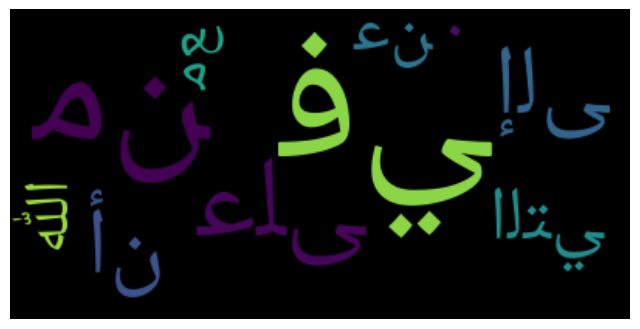

In [59]:
from ar_wordcloud import ArabicWordCloud
rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(10)}

font_file = '/content/drive/MyDrive/NLP//NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()